# Calculating Portfolio Beta
In this notebook, I calculate the beta of an aribitrary portfolio using my LinReg package to conduct linear regression and plotting. This notebook allows me to test, and use, the LinReg package with some real life data. 

We will use the yfinance package to download financial data for the portfolio.

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from LinReg import LinearRegression, Plot, RegressionStatistics

## Get data for tickers
We will begin by getting data for the tickers AAPL, TSLA, NVDA, AMD, AMZN from the yfinance library. 

In [7]:
# Dictionary of tickers and their weighting in portfolio
tickers = {"AAPL": 0.3, 
               "TSLA": 0.1, 
               "NVDA": 0.25, 
               "AMD": 0.15, 
               "AMZN": 0.2}

ticker_list = list(tickers.keys())

# Download data 
portfolio_data = yf.download(ticker_list, start = '2015-01-01', end = '2026-01-01')

# Covert data to monthly
portfolio_monthly_close = portfolio_data['Close'].resample('M').last()

# Calculate monthly percentage returns
portfolio_monthly_returns = portfolio_monthly_close.pct_change()
portfolio_monthly_returns = portfolio_monthly_returns.dropna()

# Print monthly returns data
portfolio_monthly_returns.head()

[*********************100%***********************]  5 of 5 completed
/var/folders/ny/pgx1yx0d5p5d6bxnkllv_jz40000gn/T/ipykernel_17392/2539455357.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  portfolio_monthly_close = portfolio_data['Close'].resample('M').last()


Ticker,AAPL,AMD,AMZN,NVDA,TSLA
Date,,,,,
2015-02-28,0.100777,0.210117,0.072293,0.153383,-0.001277
2015-03-31,-0.031372,-0.138264,-0.021202,-0.051224,-0.071653
2015-04-30,0.005786,-0.156716,0.133513,0.060679,0.197489
2015-05-31,0.045339,0.008850,0.017663,0.001461,0.109489
2015-06-30,-0.037228,0.052632,0.011323,-0.091279,0.069617


We can then scale the returns to the weight each ticker has in our portfolio. To do this, we convert the dicitonary into a series for use.

In [8]:
# Convert dictionary to a series
weights = pd.Series(tickers)

# Align weights with columns (if not done already)
weights = weights.reindex(portfolio_monthly_returns.columns)

# Calculate wieghted portfolio montly returns
portfolio_monthly_returns['Total_Portfolio_Return'] = portfolio_monthly_returns.dot(weights)
portfolio_monthly_returns['Total_Portfolio_Return'].head()

Date
2015-02-28    0.114427
2015-03-31   -0.054363
2015-04-30    0.039849
2015-05-31    0.029776
2015-06-30   -0.016867
Freq: ME, Name: Total_Portfolio_Return, dtype: float64

Next, we will collect the data for the returns of the S&P 500 for the same time period. 

In [9]:
# Collect data for S&P 500
market_data = yf.download("^GSPC", start = "2015-01-01", end = "2026-01-01")

# Get monthly data and returns
market_monthly_close = market_data["Close"].resample("M").last()
market_monthly_returns = market_monthly_close.pct_change()
market_monthly_returns = market_monthly_returns.dropna()

market_monthly_returns.head()

[*********************100%***********************]  1 of 1 completed
/var/folders/ny/pgx1yx0d5p5d6bxnkllv_jz40000gn/T/ipykernel_17392/2501876737.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_monthly_close = market_data["Close"].resample("M").last()


Ticker,^GSPC
Date,
2015-02-28,0.054893
2015-03-31,-0.017396
2015-04-30,0.008521
2015-05-31,0.010491
2015-06-30,-0.021012


Now, having manipulated the data, we can use the LinReg package to calculate the beta of the portfolio. We will use simple linear regression to calculate the beta.

We will also plot the model diagnostics (residuals vs fitted and QQ plot of residuals) to assess whether a linear model is appropriate for this usage (i.e. meeting the assumptions of OLS).

Beta of portfolio: 1.5687


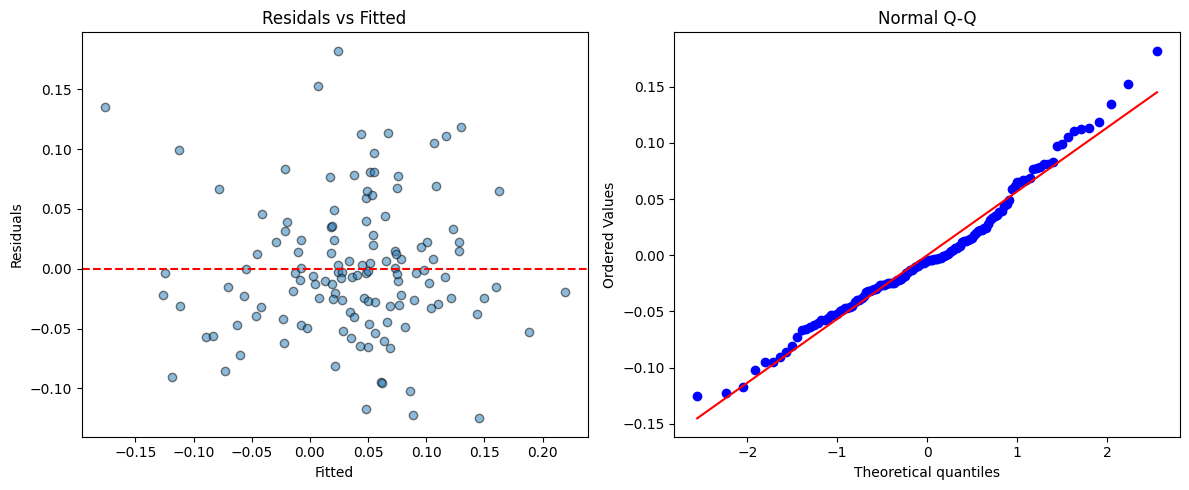

In [10]:
# Create LinearRegression object and fit model
model = LinearRegression()
coefficients = model.fit(market_monthly_returns, portfolio_monthly_returns['Total_Portfolio_Return'])

print(f"Beta of portfolio: {coefficients[1]:.4f}")

# Plot the model diagnostics to check that a linear model is appropriate
Plot.plot_diagnostics(model)

We can plot this relationship, and get statistics from the linear model.

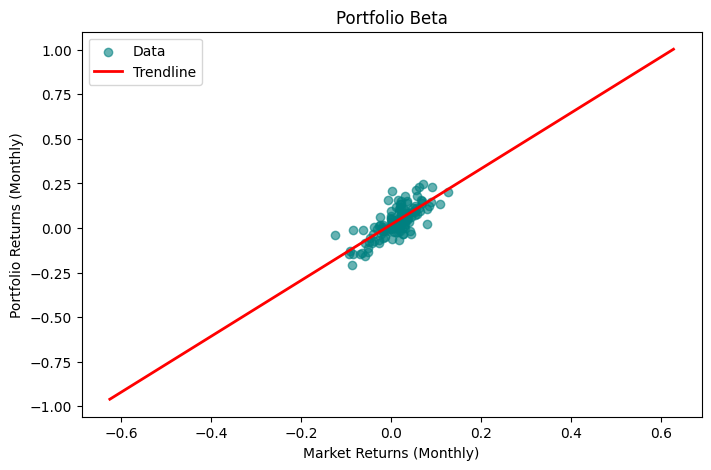

Regression Statistics:
----------------------
MSE:                   0.0033
Residual Std Error:    0.0570
Multiple R^2:          0.5876
Adjusted R^2:          0.5844
F-Statistic:           183.7966


In [11]:
# Plot a scatter graph with trendline
Plot.plot_2D_linear_trend(market_monthly_returns, portfolio_monthly_returns['Total_Portfolio_Return'], model, 
                          plot_title = "Portfolio Beta", x_label = "Market Returns (Monthly)", y_label = "Portfolio Returns (Monthly)")

stats = RegressionStatistics(model)
print(stats)
